In [1]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data_paths = glob('/content/gdrive/My Drive/fastcampus/cifar/train/*.png')
data_paths[0]

'/content/gdrive/My Drive/fastcampus/cifar/train/40572_dog.png'

In [4]:
path = data_paths[0]
path

'/content/gdrive/My Drive/fastcampus/cifar/train/40572_dog.png'

In [5]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [6]:
image.shape

TensorShape([32, 32, 3])

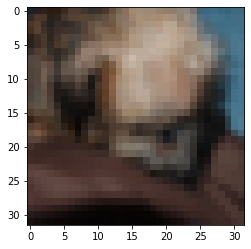

In [7]:
plt.imshow(image)
plt.show()

In [8]:
data_paths[:10]

['/content/gdrive/My Drive/fastcampus/cifar/train/40572_dog.png',
 '/content/gdrive/My Drive/fastcampus/cifar/train/5475_cat.png',
 '/content/gdrive/My Drive/fastcampus/cifar/train/19926_frog.png',
 '/content/gdrive/My Drive/fastcampus/cifar/train/6698_dog.png',
 '/content/gdrive/My Drive/fastcampus/cifar/train/20068_truck.png',
 '/content/gdrive/My Drive/fastcampus/cifar/train/18738_deer.png',
 '/content/gdrive/My Drive/fastcampus/cifar/train/9761_deer.png',
 '/content/gdrive/My Drive/fastcampus/cifar/train/27731_automobile.png',
 '/content/gdrive/My Drive/fastcampus/cifar/train/40081_automobile.png',
 '/content/gdrive/My Drive/fastcampus/cifar/train/17285_frog.png']

In [9]:
def read_image(path):
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile)
  return image

In [10]:
#묶음을 넣어준다??
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)#map은 string을 어떻게 할 것인가.

In [11]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

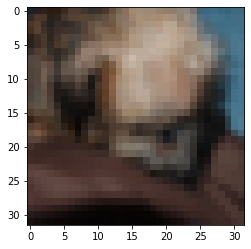

In [12]:
plt.imshow(tf_image)

#batch로 묶기
##batch로 묶ㅇ서ㅓ 넣어주는게 중요하당

In [13]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)#map은 string을 어떻게 할 것인가.
dataset = dataset.batch(batch_size)

In [14]:
tf_image = next(iter(dataset))

In [15]:
tf_image.shape#배치로 묶인걸 확인 가능

TensorShape([32, 32, 32, 3])

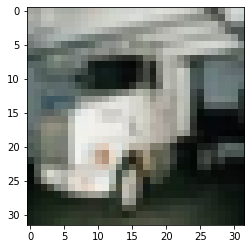

In [16]:
plt.imshow(tf_image[4])

#shuffle 하기


In [17]:
batch_size = 8
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)#map은 string을 어떻게 할 것인가.
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size = len(data_paths))

In [18]:
#tf_images = next(iter(dataset))

#label도 같이 넣기


In [19]:
path

'/content/gdrive/My Drive/fastcampus/cifar/train/40572_dog.png'

In [21]:
class_name = path.split('_')[-1].replace('.png','')

In [22]:
def get_label(path):
  return path.split('_')[-1].replace('.png','')

In [23]:
path, get_label(path)

('/content/gdrive/My Drive/fastcampus/cifar/train/40572_dog.png', 'dog')

In [24]:
label_names = [get_label(path) for path in data_paths]

In [26]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [28]:
#one hot encoding
np.array(class_names == 'frog',np.uint8)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [38]:
def onehot_encoding(label):
  return np.array(class_names == label,np.uint8)

In [30]:
def get_label(path):
  return path.split('_')[-1].replace('.png','')

In [31]:
def read_image2(path, label):
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile)
  return image, label

In [32]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
dataset = dataset.map(read_image2)#read_image는 안된다.
dataset = dataset.batch(8)
dataset = dataset.repeat()#Repeat을 해야 epoch끝나고도 된다.

In [33]:
image, label = next(iter(dataset))

In [34]:
image.shape, label.shape

(TensorShape([8, 32, 32, 3]), TensorShape([8]))

In [35]:
label[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'dog'>

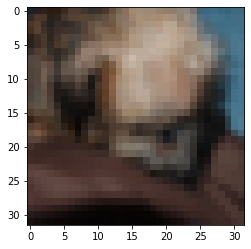

In [37]:
plt.imshow(image[0])
plt.show()

#one hot encoding까지

In [39]:
path

'/content/gdrive/My Drive/fastcampus/cifar/train/40572_dog.png'

In [ ]:
def onehot_encoding(label):
  return np.array(class_names == label,np.uint8)

In [40]:
#onehotencoding하고 넣는걸 tf의 함수만으로
fname = tf.strings.split(path,'_')[-1]
fname

<tf.Tensor: shape=(), dtype=string, numpy=b'dog.png'>

In [41]:
cls_name = tf.strings.regex_replace(fname,'.png','')
cls_name

<tf.Tensor: shape=(), dtype=string, numpy=b'dog'>

In [42]:
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [45]:
tf.cast(class_names == cls_name, tf.uint8)

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)>

In [46]:
def get_label(path):
  fname = tf.strings.split(path,'_')[-1]
  cls_name = tf.strings.regex_replace(fname,'.png','')
  return tf.cast(class_names == cls_name, tf.uint8)

In [47]:
def read_image3(path):
  #read image
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile)
  #get label
  label = get_label(path)


  return image, label

In [48]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image3)#read_image는 안된다.
dataset = dataset.batch(8)
dataset = dataset.repeat()#Repeat을 해야 epoch끝나고도 된다.

In [49]:
image, label = next(iter(dataset))

In [50]:
image.shape

TensorShape([8, 32, 32, 3])

In [51]:
label.shape

TensorShape([8, 10])

In [52]:
label[0]

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)>